In [1]:
import matplotlib.pyplot as plt
import statistics as s
import numpy as np
import pandas as pd
import math
import seaborn as sns
%matplotlib inline
data=pd.read_csv('Vestil Shipments.csv')
data.head()

,Item Order Id,"Month, Day, Year of Item Order Date PST",Shipping Method (Dim Shipping Method),Order Tracking Number,qty_items,Item Quanity,Total Weight,Sum of Shipment Cost,Freight?,Shipment Cost per KG
0,203966-1636651061,"November 11, 2021",Dayton Freight,620566416,1,1,287,413.52,Freight,1.44
1,181530-1620933410,"May 13, 2021",Dayton Freight,606387068,1,1,305,171.34,Freight,0.56
2,181662-1621018846,"May 14, 2021",Dayton Freight,606377176,1,1,384,157.85,Freight,0.41
3,61216-1632510662,"September 24, 2021",Dayton Freight,620617805,1,1,450,233.39,Freight,0.52
4,188896-1626890318,"July 21, 2021",Dayton Freight,620572661,1,1,766,372.25,Freight,0.49


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Item Order Id                            293 non-null    object 
 1   Month, Day, Year of Item Order Date PST  293 non-null    object 
 2   Shipping Method (Dim Shipping Method)    293 non-null    object 
 3   Order Tracking Number                    293 non-null    object 
 4   qty_items                                293 non-null    int64  
 5   Item Quanity                             293 non-null    int64  
 6   Total Weight                             293 non-null    object 
 7   Sum of Shipment Cost                     293 non-null    object 
 8   Freight?                                 293 non-null    object 
 9   Shipment Cost per KG                     293 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 2

In [3]:
data['Total Weight']=data['Total Weight'].str.replace(',','')
data['Total Weight']=data['Total Weight'].astype(float)
data['Sum of Shipment Cost']=data['Sum of Shipment Cost'].str.replace(',','')
data['Sum of Shipment Cost']=data['Sum of Shipment Cost'].astype(float)

In [4]:
#Shipment Cost per KG - GROUND

<AxesSubplot:title={'center':'Shipment Cost per KG'}, xlabel='Freight?'>

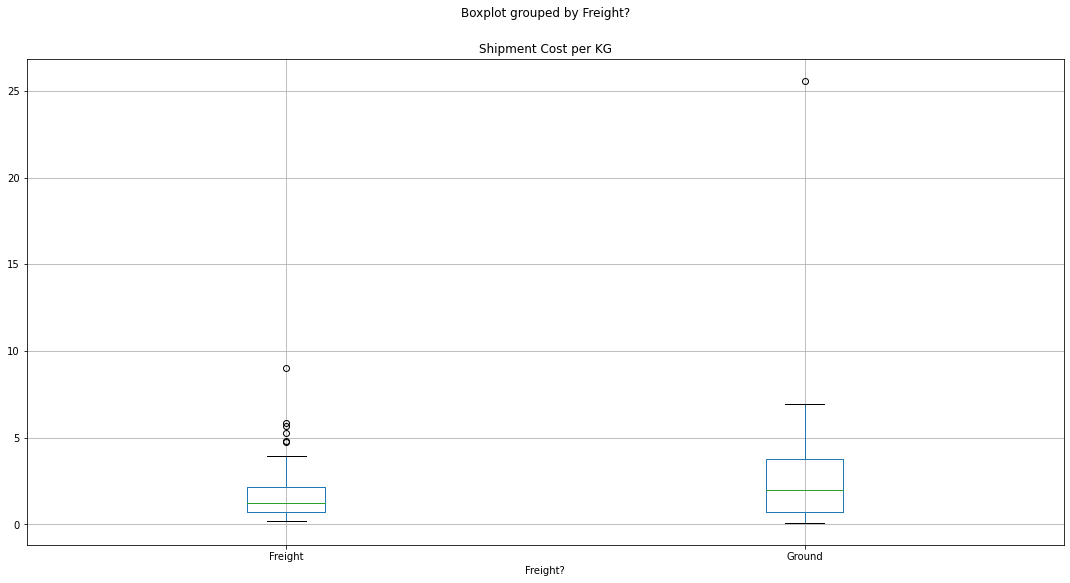

In [5]:
data.boxplot('Shipment Cost per KG', by='Freight?', figsize=(18,9), grid=True)

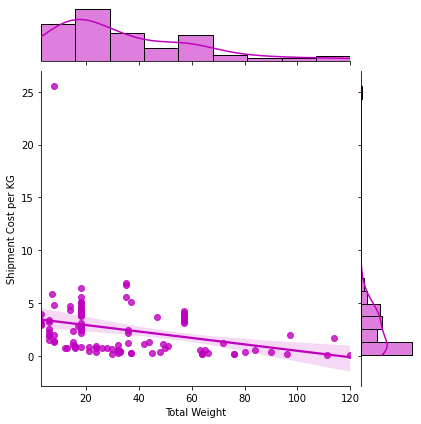

In [6]:
sns.jointplot(x='Total Weight', y='Shipment Cost per KG', data=data[data['Freight?']=='Ground'], kind='reg', color='m')

In [7]:
from scipy.stats import linregress
linregress(data[data['Freight?']=='Ground']['Total Weight'], data[data['Freight?']=='Ground']['Shipment Cost per KG'])

LinregressResult(slope=-0.030456298173024674, intercept=3.533497921839717, rvalue=-0.28374254933592225, pvalue=0.0024315833593706168, stderr=0.009813633866127542)

In [8]:
#will try to clean outliers

In [9]:
ground_kg=data[data['Freight?']=='Ground']['Shipment Cost per KG']
ground_kg = np.array(ground_kg)
q_25_ground_kg = np.quantile(ground_kg, 0.25)
q_50_ground_kg = np.quantile(ground_kg, 0.50)
q_75_ground_kg = np.quantile(ground_kg, 0.75)
print(q_25_ground_kg, q_50_ground_kg, q_75_ground_kg)

0.7224999999999999 2.005 3.745


In [10]:
x_min_ground_kg = q_25_ground_kg - (q_75_ground_kg - q_25_ground_kg) * 1.5
x_max_ground_kg = q_75_ground_kg + (q_75_ground_kg - q_25_ground_kg) * 1.5
(x_min_ground_kg, x_max_ground_kg) #выбросы не должны попадатоь в этот интервал

(-3.8112499999999994, 8.278749999999999)

In [11]:
ground_cost=data[data['Freight?']=='Ground']['Sum of Shipment Cost']
ground_cost = np.array(ground_cost)
q_25_ground_cost = np.quantile(ground_cost, 0.25)
q_50_ground_cost = np.quantile(ground_cost, 0.50)
q_75_ground_cost = np.quantile(ground_cost, 0.75)
print(q_25_ground_cost, q_50_ground_cost, q_75_ground_cost)

15.0475 37.555 79.4575


In [12]:
x_min_ground_cost = q_25_ground_cost - (q_75_ground_cost - q_25_ground_cost) * 1.5
x_max_ground_cost = q_75_ground_cost + (q_75_ground_cost - q_25_ground_cost) * 1.5
(x_min_ground_cost, x_max_ground_cost) #выбросы не должны попадатоь в этот интервал

(-81.5675, 176.0725)

In [13]:
pure_ground=data[(data['Freight?']=='Ground') & (data['Sum of Shipment Cost']>x_min_ground_cost) & (data['Sum of Shipment Cost']<x_max_ground_cost)]
pure_ground

,Item Order Id,"Month, Day, Year of Item Order Date PST",Shipping Method (Dim Shipping Method),Order Tracking Number,qty_items,Item Quanity,Total Weight,Sum of Shipment Cost,Freight?,Shipment Cost per KG
181,129248-1566837475,"August 26, 2019",UPS Ground,1Z452A950353053207,1,1,3.0,8.78,Ground,2.93
182,130532-1568216108,"September 11, 2019",UPS Ground,1Z452A950349229179,1,1,3.0,9.14,Ground,3.05
183,131220-1568844807,"September 18, 2019",UPS Ground,1Z452A950353160243,1,1,3.0,10.03,Ground,3.34
184,131517-1569258614,"September 23, 2019",UPS Ground,1Z452A950352907377,1,1,3.0,11.91,Ground,3.97
185,126529-1563817238,"July 22, 2019",UPS Ground,1Z452A950353540636,1,2,6.0,9.16,Ground,1.53
...,...,...,...,...,...,...,...,...,...,...
286,157481-1597322318,"August 13, 2020",UPS Ground,1Z0A90000358589206,1,4,84.0,45.61,Ground,0.54
287,181056-1620666574,"May 10, 2021",UPS Ground,1Z452A950302542980,1,6,90.0,36.83,Ground,0.41
288,161570-1601578036,"October 1, 2020",FedEx Ground,153262380885,1,12,96.0,17.85,Ground,0.19
290,184481-1625258789,"July 2, 2021",FedEx Ground,103771713871,1,3,111.0,10.56,Ground,0.10


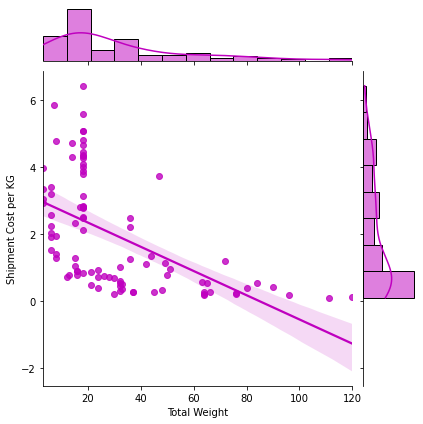

In [14]:
sns.jointplot(x='Total Weight', y='Shipment Cost per KG', data=pure_ground, kind='reg', color='m')

In [15]:
from scipy.stats import linregress
l_ground=linregress(pure_ground['Total Weight'], pure_ground['Shipment Cost per KG'])
l_ground

LinregressResult(slope=-0.036159302600852546, intercept=3.0667625145983974, rvalue=-0.54581753102238, pvalue=1.2746871135104857e-08, stderr=0.00578725940014322)

In [58]:
print('est_ground_ship_cost_per_KG=',l_ground.intercept,l_ground.slope,"* weight")
weight_ground=30
y = l_ground.intercept+l_ground.slope*weight_ground
total_cost=y*weight_ground
total_cost

est_ground_ship_cost_per_KG= 3.0667625145983974 -0.036159302600852546 * weight


59.45950309718463

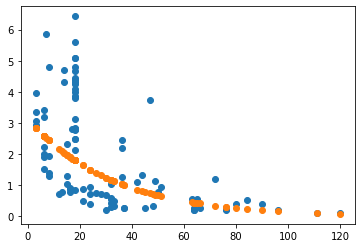

In [17]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
x_data=pure_ground['Total Weight']
y_data=pure_ground['Shipment Cost per KG']
ylog_data = np.log(y_data)
curve_fit_ground = np.polyfit(x_data, ylog_data, 1)
y = np.exp(curve_fit_ground[1]) * np.exp(curve_fit_ground[0]*x_data)
# Blue 
plt.scatter(x_data, y_data)
# best fit in orange
plt.scatter(x_data, y)

In [60]:
print('est_ground_ship_cost_per_KG=', "e",curve_fit_ground[1],"*","e(",curve_fit_ground[0],"* weight)")
weight_ground=30
y = (np.exp(curve_fit_ground[1]) * np.exp(curve_fit_ground[0]*weight_ground))*weight_ground
y

est_ground_ship_cost_per_KG= e 1.13579622444671 * e( -0.030535640457897865 * weight)


37.37209834235067

In [19]:
#Shipment Cost per KG - FREIGHT

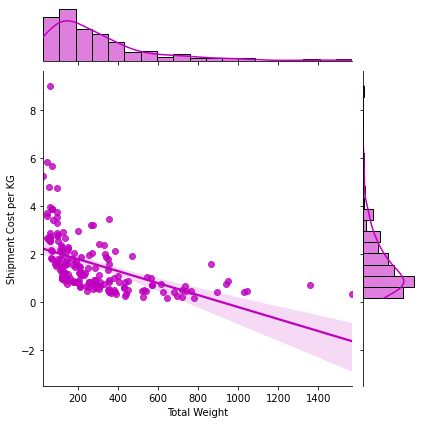

In [20]:
sns.jointplot(x='Total Weight', y='Shipment Cost per KG', data=data[data['Freight?']=='Freight'], kind='reg', color='m')

In [21]:
from scipy.stats import linregress
linregress(data[data['Freight?']=='Freight']['Total Weight'], data[data['Freight?']=='Freight']['Shipment Cost per KG'])

LinregressResult(slope=-0.002500205887819778, intercept=2.3008873925228817, rvalue=-0.49789743319430746, pvalue=9.938851327165209e-13, stderr=0.0003254967298878456)

In [22]:
#will try to clean outliers

In [23]:
freight_kg=data[data['Freight?']=='Freight']['Shipment Cost per KG']
freight_kg = np.array(freight_kg)
q_25_freight_kg = np.quantile(freight_kg, 0.25)
q_50_freight_kg = np.quantile(freight_kg, 0.50)
q_75_freight_kg = np.quantile(freight_kg, 0.75)
print(q_25_freight_kg, q_50_freight_kg, q_75_freight_kg)

0.74 1.22 2.13


In [24]:
x_min_freight_kg = q_25_freight_kg - (q_75_freight_kg - q_25_freight_kg) * 1.5
x_max_freight_kg = q_75_freight_kg + (q_75_freight_kg - q_25_freight_kg) * 1.5
(x_min_freight_kg, x_max_freight_kg) #выбросы не должны попадатоь в этот интервал

(-1.345, 4.215)

In [25]:
freight_cost=data[data['Freight?']=='Freight']['Sum of Shipment Cost']
freight_cost = np.array(freight_cost)
q_25_freight_cost = np.quantile(freight_cost, 0.25)
q_50_freight_cost = np.quantile(freight_cost, 0.50)
q_75_freight_cost = np.quantile(freight_cost, 0.75)
print(q_25_freight_cost, q_50_freight_cost, q_75_freight_cost)

158.1 257.02 352.56


In [26]:
x_min_freight_cost = q_25_freight_cost - (q_75_freight_cost - q_25_freight_cost) * 1.5
x_max_freight_cost = q_75_freight_cost + (q_75_freight_cost - q_25_freight_cost) * 1.5
(x_min_freight_cost, x_max_freight_cost) #выбросы не должны попадатоь в этот интервал

(-133.59, 644.25)

In [27]:
pure_freight=data[((data['Freight?']=='Freight') & (data['Sum of Shipment Cost']>x_min_freight_cost) & (data['Sum of Shipment Cost']<x_max_freight_cost)) & ((data['Freight?']=='Freight') & (data['Shipment Cost per KG']>x_min_freight_kg) & (data['Shipment Cost per KG']<x_max_freight_kg))]
pure_freight

,Item Order Id,"Month, Day, Year of Item Order Date PST",Shipping Method (Dim Shipping Method),Order Tracking Number,qty_items,Item Quanity,Total Weight,Sum of Shipment Cost,Freight?,Shipment Cost per KG
0,203966-1636651061,"November 11, 2021",Dayton Freight,620566416,1,1,287.0,413.52,Freight,1.44
1,181530-1620933410,"May 13, 2021",Dayton Freight,606387068,1,1,305.0,171.34,Freight,0.56
2,181662-1621018846,"May 14, 2021",Dayton Freight,606377176,1,1,384.0,157.85,Freight,0.41
3,61216-1632510662,"September 24, 2021",Dayton Freight,620617805,1,1,450.0,233.39,Freight,0.52
4,188896-1626890318,"July 21, 2021",Dayton Freight,620572661,1,1,766.0,372.25,Freight,0.49
...,...,...,...,...,...,...,...,...,...,...
172,76184-1622836978,"June 4, 2021",UPS Freight,187990375,1,1,778.0,133.55,Freight,0.17
174,116955-1554988758,"April 11, 2019",UPS Freight,820443212,1,4,896.0,366.46,Freight,0.41
177,111038-1549312703,"February 4, 2019",UPS Freight,880941611,1,10,1030.0,442.21,Freight,0.43
178,135667-1573755387,"November 14, 2019",UPS Freight,644862853,1,2,1046.0,517.66,Freight,0.49


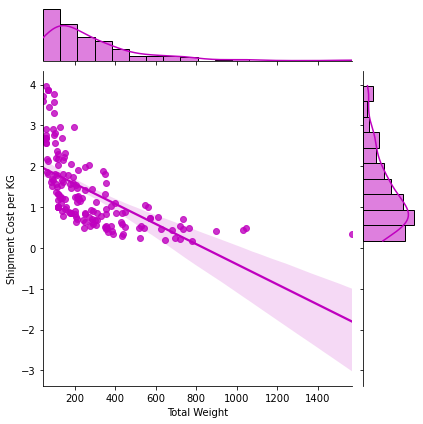

In [28]:
sns.jointplot(x='Total Weight', y='Shipment Cost per KG', data=pure_freight, kind='reg', color='m')

In [29]:
from scipy.stats import linregress
l_freight=linregress(pure_freight['Total Weight'], pure_freight['Shipment Cost per KG'])
l_freight

LinregressResult(slope=-0.002467911847597413, intercept=2.066766542785811, rvalue=-0.6089796982034794, pvalue=6.429911660952418e-18, stderr=0.0002533312847833974)

In [63]:
print('est_freight_ship_cost_per_KG=',l_freight.intercept,l_freight.slope,"* weight")
weight_freight=200
y = l_freight.intercept+l_freight.slope*weight_freight
total_cost=y*weight_freight
total_cost

est_freight_ship_cost_per_KG= 2.066766542785811 -0.002467911847597413 * weight


314.6368346532657

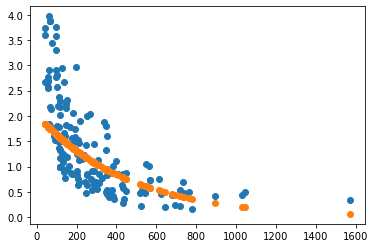

In [31]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
x_data=pure_freight['Total Weight']
y_data=pure_freight['Shipment Cost per KG']
ylog_data = np.log(y_data)
curve_fit_freight = np.polyfit(x_data, ylog_data, 1)
y = np.exp(curve_fit_freight[1]) * np.exp(curve_fit_freight[0]*x_data)
# Blue 
plt.scatter(x_data, y_data)
# best fit in orange
plt.scatter(x_data, y)

In [62]:
print('est_freight_ship_cost_per_KG=', "e",curve_fit_freight[1],"*","e(",curve_fit_freight[0],"* weight)")
weight_freight=200
y = (np.exp(curve_fit_freight[1]) * np.exp(curve_fit_freight[0]*weight_freight))*weight_freight
y = (np.exp(0.7095029289238376) * np.exp(-0.0022028536471515635*weight_freight))*weight_freight
y

est_freight_ship_cost_per_KG= e 0.7095029289238376 * e( -0.0022028536471515635 * weight)


261.7132833145837